# Best Selling Books - Amazon Analysis

### Sunpreet S Chahal

##### The dataset that I'll be analysing todays contains data regarding the best selling books on Amazon from 2009 - 2019.

**Any mentions of: 'Worst author', 'Worst rated', 'Worst reviewed' or any simillar phrase, are relative to this dataset - containing Amazon's best-selling books, not the overall book sales on Amazon's marketplace.

In [63]:
## Import libraries
import pandas as pd
import numpy as ny
import matplotlib.pyplot as mpy
import matplotlib as mtp
import seaborn as sns

In [64]:
## Import Dataframe 
#Duplicate backslashes (\) if cannot load df.
bookdb = pd.read_csv("D:\\PROJECTS\\Bestselling Books AMZN ✔\\bestsellers with categories ORIGINAL.csv")

#Present Data
bookdb

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [139]:
bookdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User_Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
 7   Count        550 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 34.5+ KB


In [78]:
#Present the dimensions of the data
bookdb.shape

(550, 7)

In [65]:
#Present the columns for future reference
columns = bookdb.columns
columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

### Data Cleaning and Manipulation

In [134]:
##Check for any null values 
#Replace if null values are detected
bookdb.isnull().sum()

Name           0
Author         0
User_Rating    0
Reviews        0
Price          0
Year           0
Genre          0
Count          0
dtype: int64

In [132]:
##Rename values to make them callable for future analysis
bookdb = bookdb.replace('Non Fiction', 'Non_fiction')
bookdb = bookdb.rename(columns={'User Rating': 'User_Rating'})

,Author,User_Rating,Reviews,Price
0,JJ Smith,4.7,17350,8
1,Stephen King,4.6,2052,22
2,Jordan B. Peterson,4.7,18979,15
3,George Orwell,4.7,21424,6
4,National Geographic Kids,4.8,7665,12
...,...,...,...,...
545,Jeff Kinney,4.9,9413,8
546,Jen Sincero,4.7,14331,8
547,Jen Sincero,4.7,14331,8
548,Jen Sincero,4.7,14331,8


In [307]:
bookdb.head(3)

,Name,Author,User_Rating,Reviews,Price,Year,Genre,Count
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non_fiction,1
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,1
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non_fiction,1


### Data Visualisation

In [113]:
##Summarise all numeric values
bookdb.describe()

,User Rating,Reviews,Price,Year,Count
count,550.000000,550.000000,550.000000,550.000000,550.0
mean,4.618364,11953.281818,13.100000,2014.000000,1.0
std,0.226980,11731.132017,10.842262,3.165156,0.0
min,3.300000,37.000000,0.000000,2009.000000,1.0
25%,4.500000,4058.000000,7.000000,2011.000000,1.0
50%,4.700000,8580.000000,11.000000,2014.000000,1.0
75%,4.800000,17253.250000,16.000000,2017.000000,1.0
max,4.900000,87841.000000,105.000000,2019.000000,1.0


We can see that a few things from the summary above:
- The most expensive book was listed for $106 

- The least expensive book was listed for $0 - possibly an audibook/e-book, which are sometimes free on Amazon. 

- The worst rated book form the selection was rated 3.3/5, which is an average rating, the reason this book has entered the top 50 is due to the volume sold, not the quality of the book. 

- The average rating for the book selection is 4.6 - a very strong rating, on average, the books are almost perfect as rated by the customers. 

- The average review count is 11,953, I will find the highest rated book in relation to the amount of reviews the book recieved. 


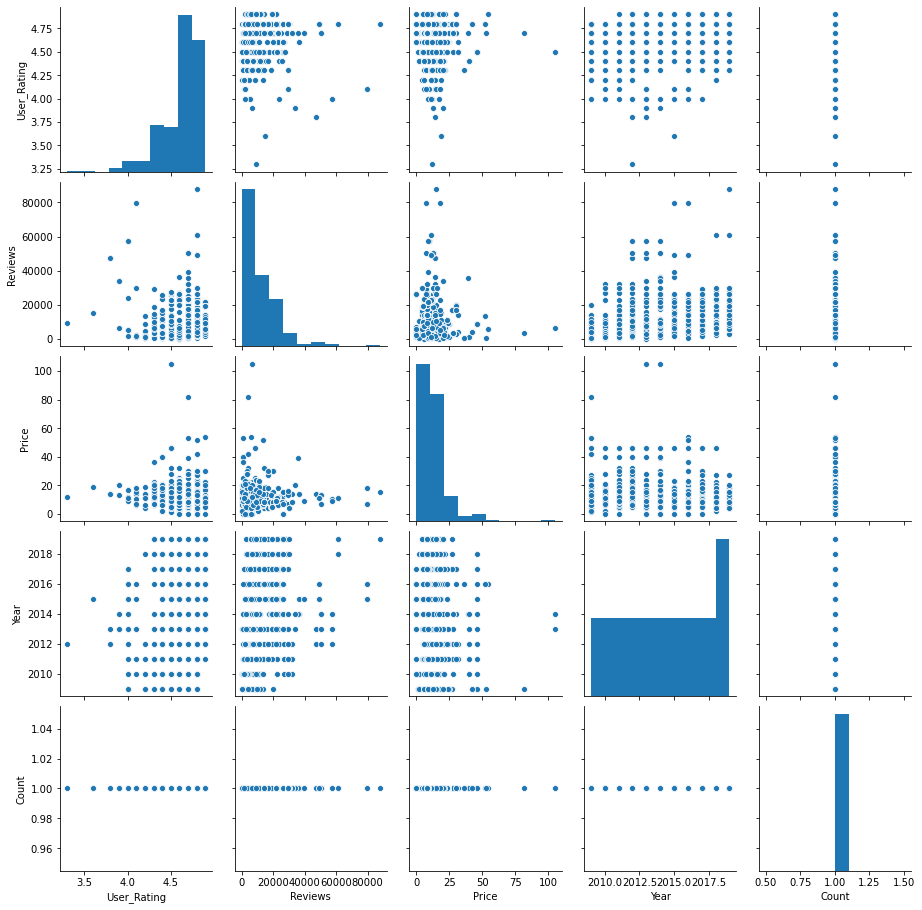

In [306]:
##Pairplot to see the correlation of all measurable values
sns.pairplot(bookdb)

The pairplot tells us a few things;
 
- Higher price doesn't indicate highr user ratings. Infact majority of the books rated 4.5+ are sub $30. 

- The two highest priced books ($82 / $105), appear to have a lower review count.

- There are some outliers within the 'User Rating' and 'Reviews' pair; 'Where the Crawdads Sing' by Delia Owens, recieved a rating of 4.8 with 87841 reviews - this is the highest rated book with the most reviews. ' byThe Girl on the Train' by Paula Hawkins recieved a rating of 4.1 with 79446 reviews, this is a noticable drop in ratings, where the difference can be seen via the graph above. 

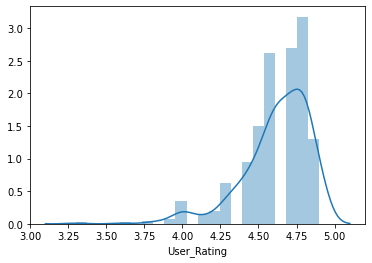

In [305]:
##Visualisation of the fluctuation of the overall user rating for this selection of books. 
sns.distplot(bookdb['User_Rating'])

Majority of the books within this selection are rated between 4.5 - 4.8. This is expected since all of the books are best-sellers, and some are repeat best-sellers. 

#### Genre Analysis

##### What's more popular? Non-fiction or Fiction? (Total)

In [84]:
##Count Values for Fiction and Non-fiction
bookdb['Count'] = 1
genrebook = bookdb.groupby(['Genre']).count()['Count']
genrebook

Genre
Fiction        240
Non_fiction    310
Name: Count, dtype: int64

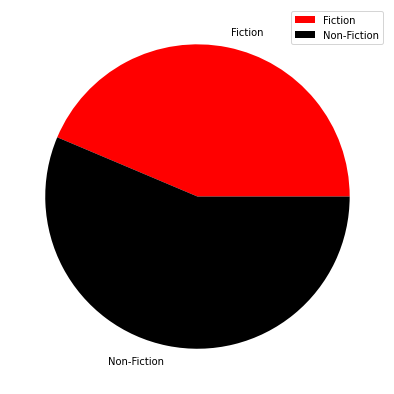

In [119]:
##Pie for Fiction / Non-fiction

#Insert values 
pievalues = [240, 310]
pielabels = ('Fiction', 'Non-Fiction')
mpy.figure(figsize= (10,7))

#Plot values
f_nf_pie = mpy.pie(pievalues, labels = pielabels, colors= ('red','black'))

#Present
mpy.legend()
mpy.show(f_nf_pie)

##### What's more popular? Non-fiction or Fiction? (Per year)

In [105]:
##Create labels for each year 
#Count the genres for each year
bookdb['Count'] = 1

yr2009 = bookdb.loc[bookdb['Year'] == 2009]
yr2009 = yr2009.groupby(['Genre']).count()['Count']
f2009 = yr2009.loc['Fiction']
nf2009 = yr2009.loc['Non_fiction']

yr2010 = bookdb.loc[bookdb['Year'] == 2010]
yr2010 = yr2010.groupby(['Genre']).count()['Count']
f2010 = yr2010.loc['Fiction']
nf2010 = yr2010.loc['Non_fiction']

yr2011 = bookdb.loc[bookdb['Year'] == 2011]
yr2011 = yr2011.groupby(['Genre']).count()['Count']
f2011 = yr2011.loc['Fiction']
nf2011 = yr2011.loc['Non_fiction']

yr2012 = bookdb.loc[bookdb['Year'] == 2012]
yr2012 = yr2012.groupby(['Genre']).count()['Count']
f2012 = yr2012.loc['Fiction']
nf2012 = yr2012.loc['Non_fiction']

yr2013 = bookdb.loc[bookdb['Year'] == 2013]
yr2013 = yr2013.groupby(['Genre']).count()['Count']
f2013 = yr2013.loc['Fiction']
nf2013 = yr2013.loc['Non_fiction']

yr2014 = bookdb.loc[bookdb['Year'] == 2014]
yr2014 = yr2014.groupby(['Genre']).count()['Count']
f2014 = yr2014.loc['Fiction']
nf2014 = yr2014.loc['Non_fiction']

yr2015 = bookdb.loc[bookdb['Year'] == 2015]
yr2015 = yr2015.groupby(['Genre']).count()['Count']
f2015 = yr2015.loc['Fiction']
nf2015 = yr2015.loc['Non_fiction']

yr2016 = bookdb.loc[bookdb['Year'] == 2016]
yr2016 = yr2016.groupby(['Genre']).count()['Count']
f2016 = yr2016.loc['Fiction']
nf2016 = yr2016.loc['Non_fiction']

yr2017 = bookdb.loc[bookdb['Year'] == 2017]
yr2017 = yr2017.groupby(['Genre']).count()['Count']
f2017 = yr2017.loc['Fiction']
nf2017 = yr2017.loc['Non_fiction']

yr2018 = bookdb.loc[bookdb['Year'] == 2018]
yr2018 = yr2018.groupby(['Genre']).count()['Count']
f2018 = yr2018.loc['Fiction']
nf2018 = yr2018.loc['Non_fiction']

yr2019 = bookdb.loc[bookdb['Year'] == 2019]
yr2019 = yr2019.groupby(['Genre']).count()['Count']
f2019 = yr2019.loc['Fiction']
nf2019 = yr2019.loc['Non_fiction']

nf2016

31

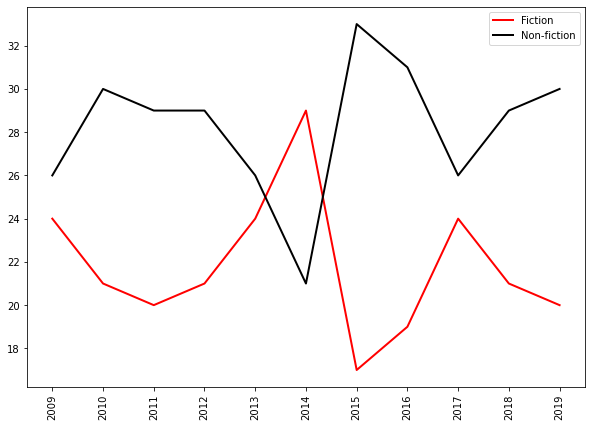

In [268]:
##Bar for annual book sale genres 
#Supply values for fiction and non-fiction 
linevaluesf = [f2009,f2011,f2010,f2012,f2013,
              f2014,f2015,f2016,f2017,f2018,f2019]
linevaluesnf = [nf2009,nf2010,nf2011,nf2012,nf2013,nf2014,
               nf2015,nf2016,nf2017,nf2018,nf2019] 
linelabels = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
mpy.figure(figsize= (10,7))

#Plot values
linefiction = mpy.plot(linelabels, linevaluesf, label= 'Fiction', linewidth= 2, color= 'red')
linenonfiction = mpy.plot(linelabels, linevaluesnf, label= 'Non-fiction', linewidth= 2, color= 'black')

mpy.yticks()
mpy.xticks(rotation= 'vertical')

#Present graph
mpy.legend()
mpy.show()

#### Author Analysis 

In [137]:
##Extract data regarding the authors
authors = bookdb[['Author', 'User_Rating', 'Reviews', 'Price']]
authors.head(5)

,Author,User_Rating,Reviews,Price
0,JJ Smith,4.7,17350,8
1,Stephen King,4.6,2052,22
2,Jordan B. Peterson,4.7,18979,15
3,George Orwell,4.7,21424,6
4,National Geographic Kids,4.8,7665,12


##### Best and Worst rated author

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 <a list of 7 Text major ticklabel objects>)

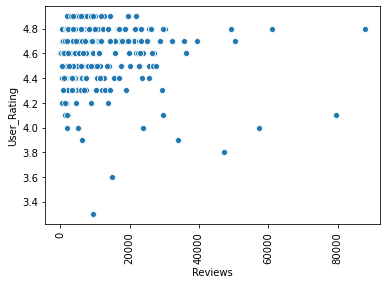

In [293]:
##Visualise the relation of; Reviews and overall user rating
auth_rates = sns.scatterplot(data=bookdb, x="Reviews", y="User_Rating")
mpy.xticks(rotation=90)

In [304]:
##Locate the book with the most reviews and the highest user rating
authortop = bookdb.loc[bookdb['Reviews'] > 80000]
authortop

,Name,Author,User_Rating,Reviews,Price,Year,Genre,Count
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction,1


In [294]:
##Locate the book with the least reviews and the lowest user rating
authorbottom = bookdb.loc[(bookdb['Reviews'] < 15000) & (bookdb['User_Rating'] < 3.4)]
authorbottom

,Name,Author,User_Rating,Reviews,Price,Year,Genre,Count
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction,1


Best book and author (Relative to review count and overall user rating) 
- 'Where the Crawdads Sing' by Delia Owens, with a user rating of; 4.8 with 87841 reviews.	

Worst book and author (Relative to review count and overall user rating) 
- 'The Casual Vacancy' by J.K. Rowling with a user rating of; 3.3 with 9372	reviews.

##### Most expensive books

In [309]:
##Order the books in order of price, and then select the most expensive ones (5 to 10)
author_bprice = bookdb.sort_values('Price', ascending= True)
author_bprice = author_bprice.tail(10)
author_bprice = author_bprice.drop_duplicates('Name')
author_bprice

,Name,Author,User_Rating,Reviews,Price,Year,Genre,Count
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non_fiction,1
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016,Fiction,1
346,The Book of Basketball: The NBA According to T...,Bill Simmons,4.7,858,53,2009,Non_fiction,1
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non_fiction,1
473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009,Fiction,1
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non_fiction,1


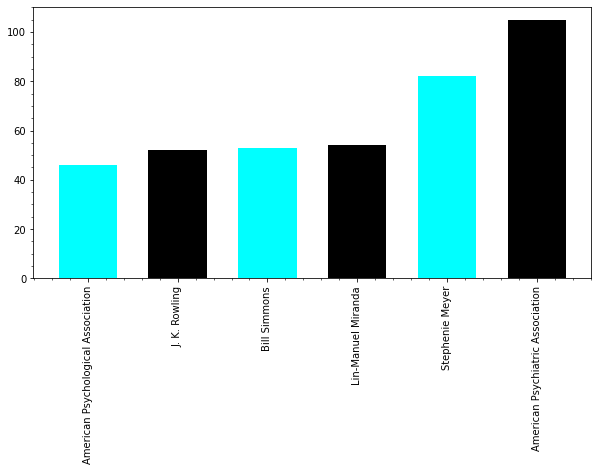

In [324]:
##Visualise the most expensive books
#Bar values
pbarvalues = [46,52,53,54,82,105]
pbarlabels = ['American Psychological Association', 'J. K. Rowling', 'Bill Simmons', 'Lin-Manuel Miranda',
              'Stephenie Meyer', 'American Psychiatric Association']
mpy.figure(figsize= (10,5))

#Plot data
pricebar = mpy.bar(pbarlabels, pbarvalues, width = 0.65, label = 'Book Prices', color=['cyan', 'black'])
mpy.yticks()
mpy.xticks(pbarlabels, rotation= 'vertical')
mpy.minorticks_on()